### Setup 
The following blocks of code will install the required packages and download the datasets to your Colab environment.

In [ ]:
%%capture
if 'google.colab' in str(get_ipython()):
  !pip install contextily

In [ ]:
import contextily as cx
from contextily import Place
import matplotlib.pyplot as plt
import os

In [ ]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

### Rendering Basemap for a City

Contextily provides an easy way to render tiles for a location using the OpenStreetMap's Nominatim API. Any location name from OpenStreetMap can be geocoded and displayed using the [Contextily Place API](https://contextily.readthedocs.io/en/latest/places_guide.html). 

We can use it to quickly create a high-resolution rendering of any city using any supported basemap.

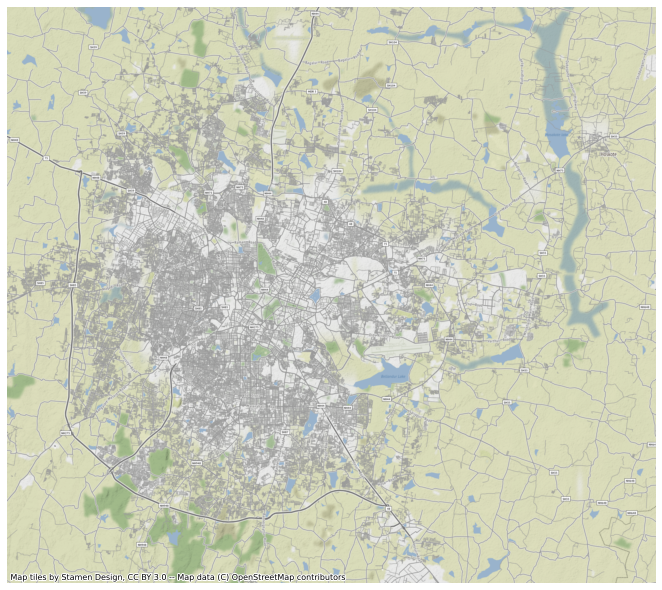

In [ ]:
place = Place('Bangalore', zoom=13)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(11.7, 8.3) # A4 paper
place.plot(ax=ax)
ax.set_axis_off()
plt.tight_layout()
plt.show()

In [ ]:
place = Place('Bangalore', zoom=15, source=cx.providers.Stamen.Toner)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(11.7, 8.3) # A4 paper
place.plot(ax=ax)
ax.set_axis_off()
plt.tight_layout()
plt.show()

The Place API returns the rendering of the city based on its boundng box.

In [ ]:
place = Place('Bangalore')
x_min, x_max, y_min, y_max = place.bbox_map
print('Original BBOX', x_min, x_max, y_min, y_max)

Original BBOX 8619650.805662755 8668570.503765268 1438239.1242138757 1477374.882695885


IF we wanted to create a rendering for exact dimensions, we have to adjust the default bounding box. Here we want to create a rendering that will fit A4 size paper (11.69 in x 8.27 in). We compute the required ratio and adjust the bounds so the resulting ratio matches our paper size.

In [ ]:
paper_width = 11.69
paper_height = 8.27

ratio = paper_width/paper_height

x_size = x_max - x_min
x_size_required = ratio*(y_max - y_min)

difference =  x_size_required - x_size
x_min = x_min - difference/2
x_max = x_max + difference/2
print('Adjusted BBOX', x_min, x_max, y_min, y_max)

Adjusted BBOX 8616450.617431382 8671770.691996641 1438239.1242138757 1477374.882695885


Now we have the bounding box cooridnates, we can use the `bounds2img` method to fetch the tiles and create a map.

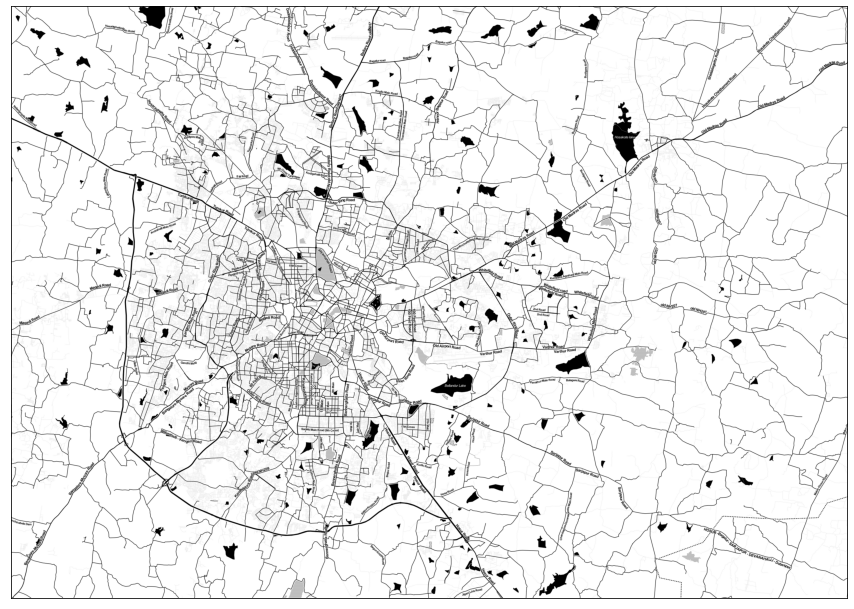

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(paper_width, paper_height)

basemap, extent = cx.bounds2img(x_min, y_min, x_max, y_max, zoom=13, source=cx.providers.Stamen.Toner)
ax.imshow(basemap, extent=extent)

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout(pad=0)

output_file = 'basemap.png'
output_path = os.path.join(output_folder, output_file)
plt.savefig(output_path, dpi=300,bbox_inches='tight', pad=0)
plt.show()

### Managing Tile Cache

Contextily fetches map tiles from the specified service and caches them locally. This allowed you to re-use these tiles without having to download them again. The default location is a temporary directory that is stored as `contextily.tile.memory` variable.

In [ ]:
cx.tile.memory

Memory(location=/tmp/tmpsbiqduxy/joblib)

We can also set a different folder for caching tiles. Let's use `set_cache_dir()` function to use a folder named `tiles` on the current directory.

In [ ]:
cache_folder = 'tiles'
if not os.path.exists(cache_folder):
    os.mkdir(cache_folder)
cx.set_cache_dir(cache_folder)

Now whenever new tiles are fetched, they will be stored in the specified cache folder.

In [ ]:
place = Place('Bangalore', zoom=15, source=cx.providers.Stamen.Toner)